In [2]:
import pandas as pd
df = pd.read_csv(r'C:\sandeep\Prep\Data Analyst\PROJECTS\archive\train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())


Dataset shape: (9800, 18)

Column names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']


In [4]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

avg_sales =df['Sales'].mean()
print(f"Average Sale : ${avg_sales :.2f}")

Total Sales: $2,261,536.78
Average Sale : $230.77


In [5]:
sales_by_category = df.groupby('Category') ['Sales'].sum()
print(sales_by_category)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


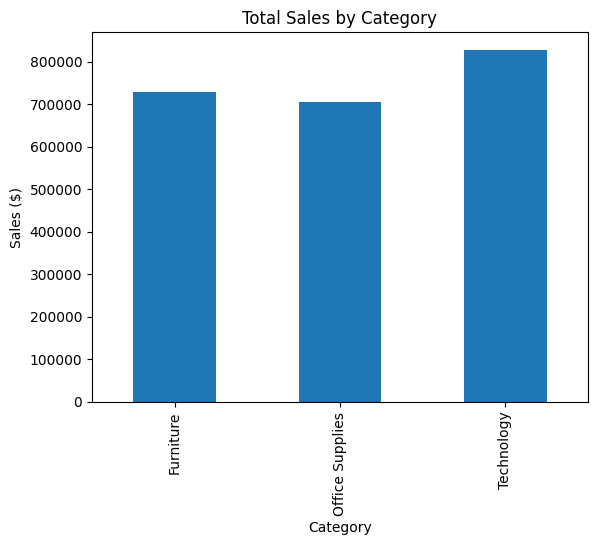

In [6]:
import matplotlib.pyplot as plt

sales_by_category.plot(kind ='bar')
plt.title('Total Sales by Category')
plt.ylabel('Sales ($)')
plt.show()

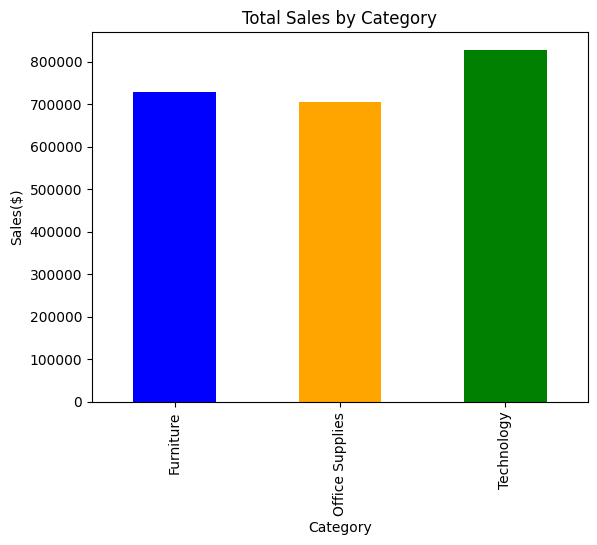

In [11]:
sales_by_category.plot(kind ='bar', color=['blue' , 'orange','green'])
plt.title('Total Sales by Category')
plt.ylabel('Sales($)')
plt.savefig('sales_by_category.png')
plt.show()

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


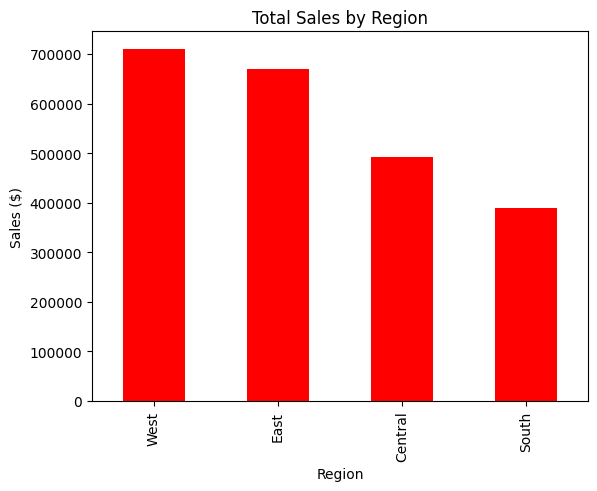

In [12]:
sales_by_region = df.groupby('Region') ['Sales'].sum().sort_values(ascending =False)
print(sales_by_region)

sales_by_region.plot(kind ='bar',color ='red')
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.savefig('sales_by_region.png')
plt.show()

Order Date
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64


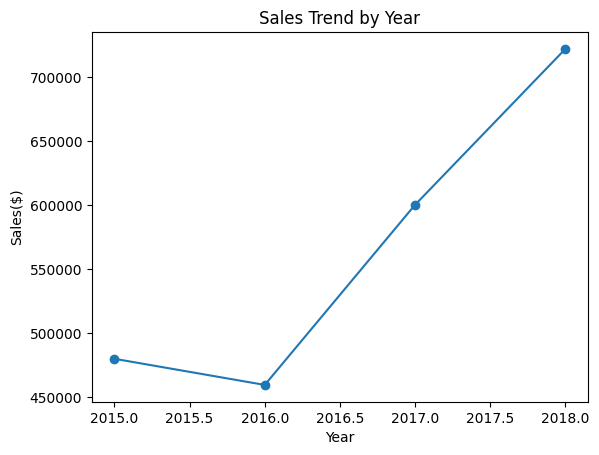

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
sales_by_year =df.groupby(df['Order Date'].dt.year)['Sales'].sum()
print(sales_by_year)

sales_by_year.plot(kind='line', marker='o')
plt.title('Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Sales($)')
plt.savefig('sales_trend.png')
plt.show()

In [16]:
print("="*50)
print("KEY INSIGHTS FROM ANALYSIS")
print("="*50)
print(f"\n1. Total Revenue: ${df['Sales'].sum():,.2f}")
print(f"2. Total Orders : {df['Order ID'].nunique():,}")
print(f"3. Total Customers : {df['Customer ID'].nunique():,}")
print(f"4. Average Order Value ${df.groupby('Order ID') ['Sales'].sum().mean():.2f}")
print(f"\n5. Top Category: {sales_by_category.idxmax()} (${sales_by_category.max():,.2f})")
print(f"6. Best Region: {sales_by_region.idxmax()} (${sales_by_region.max():,.2f})")
print(f"7. Growth: Sales increased {((sales_by_year.iloc[-1] / sales_by_year.iloc[0] - 1) * 100):.1f}% from 2015 to 2018")

KEY INSIGHTS FROM ANALYSIS

1. Total Revenue: $2,261,536.78
2. Total Orders : 4,922
3. Total Customers : 793
4. Average Order Value $459.48

5. Top Category: Technology ($827,455.87)
6. Best Region: West ($710,219.68)
7. Growth: Sales increased 50.5% from 2015 to 2018
